<img src="images/keepcoding.png" width=200 align="left">

# Módulo de álgebra: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica consta de cuatro bloques, y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Powersets

El [powerset](https://en.wikipedia.org/wiki/Power_set) o conjunto de partes de un conjunto es otro conjunto que contiene todos los posibles subconjuntos. Por ejemplo, en el conjunto {'perro', 'gato', 'conejo'} tendremos los siguientes subconjuntos:

{} 
{'perro'}
{'perro', 'gato'}
{'perro', 'gato', 'conejo'}
{'perro', 'conejo'}
{'gato'}
{'gato', 'conejo'}
{'conejo'}

El conjunto vacío y el conjunto inicial forman siempre parte del powerset de un conjunto C. El cardinal del powerset es $2^n$, siendo n el número de elementos del conjunto.

Vamos a implementar el powerset con Python.

### 1.1 Implementación iterativa

Implementa una función para obtener el powerset de un conjunto dado de forma iterativa. También se puede hacer de forma recursiva, porque el powerset de {1, 2, 3} contiene al de {1, 2}.

In [1]:
# FORMA ITERATIVA utilizando CARDINALIDAD
def powerset(A):

    elements = list(A)
    cardinal = 2**len(elements)
    
    pS =set([])
 
    for counter in range(0, cardinal):
        results = []
        for j in range(0, len(elements)):
            #print(f'counter {counter:04b} - j {j} - (1 << j) {1 << j:04b} - bit operation {counter & (1 << j)}')
            
            # take the element if on bit position j it says to take it (i.e. 1 appears)
            if((counter & (1 << j)) > 0):
                results.append(elements[j])
        
        pS.add(frozenset(results))
            
    return list(map(set,pS))

In [2]:
print(powerset(set()))
print(powerset({1,2,3}))
print(powerset({'coche','bici','avion', 'moto'}))

[set()]
[{2}, {2, 3}, {1, 2}, {1, 2, 3}, {3}, {1}, set(), {1, 3}]
[{'avion', 'moto'}, {'bici'}, {'avion', 'coche'}, {'bici', 'avion', 'moto'}, {'bici', 'avion', 'coche'}, {'bici', 'moto'}, {'bici', 'coche'}, {'bici', 'moto', 'coche'}, {'avion'}, {'moto', 'coche'}, {'bici', 'avion'}, {'bici', 'avion', 'moto', 'coche'}, set(), {'moto'}, {'avion', 'moto', 'coche'}, {'coche'}]


In [3]:
# FORMA RECURSIVA
def powerset_recursive(A):

    elems = list(A)
    
    yield [] # first return the result we’re sure about 
    for i in range(len(elems)):
        for x in powerset_recursive(elems[i+1:]): 
            # induction part 
            yield [elems[i]] + x

In [4]:
print(list(map(set,powerset_recursive(set()))))
print(list(map(set,powerset_recursive({1,2,3}))))
print(list(map(set,powerset_recursive({'coche','bici','avion', 'moto'}))))

[set()]
[set(), {1}, {1, 2}, {1, 2, 3}, {1, 3}, {2}, {2, 3}, {3}]
[set(), {'bici'}, {'bici', 'avion'}, {'bici', 'avion', 'moto'}, {'bici', 'avion', 'moto', 'coche'}, {'bici', 'avion', 'coche'}, {'bici', 'moto'}, {'bici', 'moto', 'coche'}, {'bici', 'coche'}, {'avion'}, {'avion', 'moto'}, {'avion', 'moto', 'coche'}, {'avion', 'coche'}, {'moto'}, {'moto', 'coche'}, {'coche'}]


### 1.2 OPCIONAL Implementación usando itertools

Implementa una función para obtener el powerset de un conjunto dado usando la librería `itertools`. En este caso, podemos dejar el resultado como tuplas, en lugar de sets.

https://docs.python.org/3/library/itertools.html

In [5]:
import itertools as it

def powerset_it(A):
    s = list(A)
    return it.chain.from_iterable(it.combinations(s, r) for r in range(len(s)+1))

In [6]:
print(list(map(set,powerset_it(set()))))
print(list(map(set,powerset_it({1,2,3}))))
print(list(map(set,powerset_it({'coche','bici','avion', 'moto'}))))

[set()]
[set(), {1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}, {1, 2, 3}]
[set(), {'bici'}, {'avion'}, {'moto'}, {'coche'}, {'bici', 'avion'}, {'bici', 'moto'}, {'bici', 'coche'}, {'avion', 'moto'}, {'avion', 'coche'}, {'moto', 'coche'}, {'bici', 'avion', 'moto'}, {'bici', 'avion', 'coche'}, {'bici', 'moto', 'coche'}, {'avion', 'moto', 'coche'}, {'bici', 'avion', 'moto', 'coche'}]


## 2. SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.misc`
- La implementación del algoritmo en `np.linalg`
- El error SEE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

Lo primero, vemos la imagen que vamos a comprimir:

/var/folders/fj/6rc9gcxj7454r8gd3w4jdhtc0000gn/T/ipykernel_66030/969300423.py:6: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  A = misc.face(gray=True)


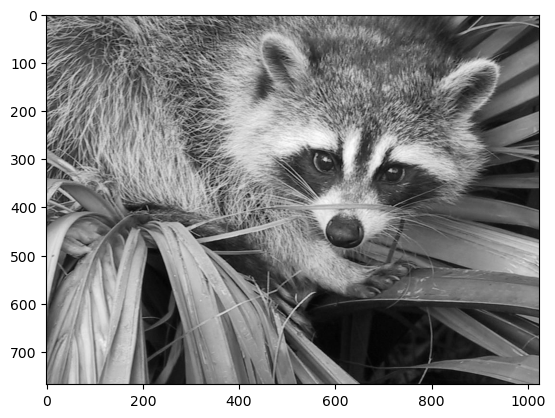

In [7]:
import matplotlib.pyplot as plt
from scipy import misc
%matplotlib inline

# Load image
A = misc.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

Las siguientes funciones te ayudarán a llegar a la solución final:

### 2.1 Implementa la función para el SEE
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [8]:
import numpy as np

def sse_score(X, X_hat):
    return np.sum((X - X_hat) ** 2)
     

X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
sse = sse_score(X, X_hat)  
print(sse)

0.09879999999999997


In [9]:
# Comprobamos que usando el mismo array el error sea CERO
X = np.array([[1, 2], [3, 4]])
X_hat = X
sse = sse_score(X, X_hat)  
print(sse)

0


### 2.2 Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [10]:
from scipy.linalg import svd

def svm(X):
    U, s, Vt = svd(X, full_matrices = False)
    S = np.diag(s)
    return (U, S, Vt)

X = np.array([[1, 2], [3, 4]])
U, S, Vt = svm(X)  
print(f"U \n{U}")
print(f"S \n{S}")
print(f"Vt \n{Vt}")

U 
[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
S 
[[5.4649857  0.        ]
 [0.         0.36596619]]
Vt 
[[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


### 2.3 Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [11]:
def reconstruction(U, S, Vt):
    return U.dot(S.dot(Vt))
    

U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])
X_hat = reconstruction(U, S, Vt)
X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [12]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715304986234458e-15


### 2.4 Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. 

In [13]:
### Función que recibe una imagen A y devuelve la imagen comprimida
### Tiene como entrada A y el número de componentes para realizar la reducción de dimensionalidad
### Devuelve la imagen comprimidad y el error de reconstrucción

### Hint: Usa las funciones anteriormente construidas
### TU RESPUESTA ABAJO


def image_compression(A, n_comp):
    #Aplicar SVD
    U, S, Vt = svm(A) 
    
    #Reconstruir usando solo el número de componentes n_comp
    S_hat = S[0:n_comp, 0:n_comp]
    U_hat = U[:, 0:n_comp]
    Vt_hat = Vt[0:n_comp, :]
    A_hat = reconstruction(U_hat, S_hat, Vt_hat)
    
    #Calcular el error
    sse = sse_score(A, A_hat)

    return A_hat, sse

racoon = misc.face(gray=True)
racoon_hat, sse = image_compression(racoon, n_comp=50)

/var/folders/fj/6rc9gcxj7454r8gd3w4jdhtc0000gn/T/ipykernel_66030/2300536112.py:24: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  racoon = misc.face(gray=True)


### 2.5 Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`.

Text(0.5, 1.0, 'racoon_100')

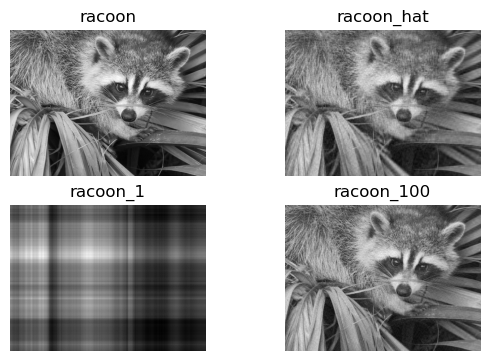

In [14]:
racoon_1, sse_1 = image_compression(racoon, n_comp=1)
racoon_100, sse_100 = image_compression(racoon, n_comp=100)

#Dibuja las graficas

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")

ax_racoon = axs[0,0]
ax_racoon.imshow(racoon, cmap=plt.cm.gray)
ax_racoon.axis("off")
ax_racoon.set_title("racoon")

ax_racoon_hat = axs[0,1]
ax_racoon_hat.imshow(racoon_hat, cmap=plt.cm.gray)
ax_racoon_hat.axis("off")
ax_racoon_hat.set_title("racoon_hat")

ax_racoon_1 = axs[1,0]
ax_racoon_1.imshow(racoon_1, cmap=plt.cm.gray)
ax_racoon_1.axis("off")
ax_racoon_1.set_title("racoon_1")

ax_racoon_100 = axs[1,1]
ax_racoon_100.imshow(racoon_100, cmap=plt.cm.gray)
ax_racoon_100.axis("off")
ax_racoon_100.set_title("racoon_100")

## 3. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a los datos

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde y es la variable a predecir y X la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 3.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [ ]:
X.head()

In [ ]:
y.head()

Crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en galones por milla) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo.

In [ ]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    # TODO dibuja la gráfica
    

visualiza(X, y, 'horsepower')

In [ ]:
visualiza(X, y, 'acceleration')

In [ ]:
visualiza(X, y, 'weight')

Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 3.2 Implementación del modelo

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [ ]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial
    
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    

    # TODO 3 Calcula los pesos

    return w

In [ ]:
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

### 3.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [ ]:
# TODO Aplica el modelo y dibuja la recta junto con los datos



Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

## 4. Optimización con descenso del gradiente

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 4.0 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



### 4.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [ ]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 Añade la columna de 1s
    
    
    # TODO 2 Haz un bucle para las iteraciones 
    # TODO 3 Dentro del bucle tendrás que actualizar el error y los pesos y añadirlos a las listas
    
    
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

### 4.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

In [ ]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate


# TODO 2 Aplicamos el algoritmo


# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gráfica
